# Task 1: Data Loading & Exploratory Data Analysis (EDA)

In [16]:
import pandas as pd
from pathlib import Path

# Define the folder and file path
events_folder = Path("../data/events")
events_folder.mkdir(parents=True, exist_ok=True)
events_file = events_folder / "key_oil_market_events.csv"

# Create a sample events dataframe
events_data = [
    {"Date": "1990-08-02", "Event": "Iraq invades Kuwait - Oil Crisis"},
    {"Date": "1991-01-17", "Event": "Gulf War begins"},
    {"Date": "1997-07-01", "Event": "Asian Financial Crisis starts"},
    {"Date": "2001-09-11", "Event": "9/11 Terrorist Attacks"},
    {"Date": "2003-03-20", "Event": "Iraq War begins"},
    {"Date": "2008-09-15", "Event": "Lehman Brothers collapse - Global Financial Crisis"},
    {"Date": "2011-02-11", "Event": "Libyan Civil War starts"},
    {"Date": "2014-06-01", "Event": "OPEC decides to maintain production - Price drop"},
    {"Date": "2016-11-30", "Event": "OPEC cuts production agreement"},
    {"Date": "2020-03-09", "Event": "Oil price war: Saudi-Russia conflict"},
    {"Date": "2020-04-20", "Event": "WTI oil prices negative for first time"},
    {"Date": "2021-01-06", "Event": "US Capitol attack affects markets"},
    {"Date": "2022-02-24", "Event": "Russia-Ukraine war begins"},
]

events_df = pd.DataFrame(events_data)

# Save to CSV
events_df.to_csv(events_file, index=False)
print(f"✅ Events CSV saved at {events_file}")

✅ Events CSV saved at ..\data\events\key_oil_market_events.csv


In [1]:
# -----------------------------
# 0. Imports and src connection
# -----------------------------
import sys
import os
import pandas as pd

# Add the project root folder to sys.path so src modules can be imported
project_root = os.path.abspath(os.path.join('..'))
sys.path.append(os.path.join(project_root, 'src'))

# Import functions from your src/task1_analysis.py
from task1_analysis import (
    load_brent_prices, 
    load_events, 
    plot_price_series, 
    plot_log_returns, 
    summary_statistics
)

print("✅ src module imported successfully")

# -----------------------------
# 1. Define file paths
# -----------------------------
brent_file = os.path.join(project_root, 'data', 'raw', 'BrentOilPrices.csv')
events_file = os.path.join(project_root, 'data', 'events', 'key_oil_market_events.csv')

print(f"Brent prices file: {brent_file}")
print(f"Events file: {events_file}")

✅ src module imported successfully
Brent prices file: D:\Personal\KAIM-10 Academy\week 11\Project\energy-market-analysis\data\raw\BrentOilPrices.csv
Events file: D:\Personal\KAIM-10 Academy\week 11\Project\energy-market-analysis\data\events\key_oil_market_events.csv


In [2]:
# -----------------------------
# 2. Load data
# -----------------------------
brent_df = load_brent_prices(brent_file)
events_df = load_events(events_file)

# Notify
print(f"✅ Brent prices loaded: {len(brent_df)} rows")
if events_df.empty:
    print(f"⚠️ Events DataFrame is empty. No events will be plotted.")
else:
    print(f"✅ Events loaded: {len(events_df)} rows")

# Quick inspection
display(brent_df.head())
display(events_df.head())

✅ Brent prices loaded: 8360 rows
✅ Events loaded: 13 rows


,Date,Price
0,1987-05-20,18.63
1,1987-05-21,18.45
2,1987-05-22,18.55
3,1987-05-25,18.60
4,1987-05-26,18.63


,Date,Event
0,1990-02-08,Iraq invades Kuwait - Oil Crisis
1,NaT,Gulf War begins
2,1997-01-07,Asian Financial Crisis starts
3,2001-11-09,9/11 Terrorist Attacks
4,NaT,Iraq War begins


3️⃣ Inspect the Data

In [3]:
# -----------------------------
# 3. Inspect data
# -----------------------------

# Brent Prices inspection
print("📊 Brent Prices Overview:")
print(f"Total rows: {len(brent_df)}")
print(f"Missing values:\n{brent_df.isna().sum()}\n")
display(brent_df.head())

# Events inspection
print("📌 Events Overview:")
if events_df.empty:
    print("⚠️ No events loaded yet.")
else:
    print(f"Total events: {len(events_df)}")
    print(f"Missing dates: {events_df['Date'].isna().sum()}")
    display(events_df.head())

# Brent prices descriptive statistics
print("📈 Brent Prices Summary Statistics:")
brent_stats = brent_df['Price'].describe()
display(brent_stats)

# Compute log returns for further analysis
import numpy as np
brent_df['Log_Returns'] = np.log(brent_df['Price'] / brent_df['Price'].shift(1))
log_returns_stats = brent_df['Log_Returns'].describe()
print("📉 Log Returns Summary Statistics:")
display(log_returns_stats)

📊 Brent Prices Overview:
Total rows: 8360
Missing values:
Date     0
Price    0
dtype: int64



,Date,Price
0,1987-05-20,18.63
1,1987-05-21,18.45
2,1987-05-22,18.55
3,1987-05-25,18.60
4,1987-05-26,18.63


📌 Events Overview:
Total events: 13
Missing dates: 6


,Date,Event
0,1990-02-08,Iraq invades Kuwait - Oil Crisis
1,NaT,Gulf War begins
2,1997-01-07,Asian Financial Crisis starts
3,2001-11-09,9/11 Terrorist Attacks
4,NaT,Iraq War begins


📈 Brent Prices Summary Statistics:


count    8360.000000
mean       46.459669
std        32.504671
min         9.100000
25%        18.780000
50%        31.750000
75%        67.042500
max       143.950000
Name: Price, dtype: float64

📉 Log Returns Summary Statistics:


count    8359.000000
mean       -0.000085
std         0.024876
min        -0.643699
25%        -0.011153
50%         0.000089
75%         0.011786
max         0.301613
Name: Log_Returns, dtype: float64

4️⃣ Summary Statistics

In [4]:
# -----------------------------
# 4. Summary statistics table
# -----------------------------
summary_table = pd.DataFrame({
    'Brent Prices': brent_df['Price'].describe()[['min', '25%', '50%', '75%', 'max', 'mean', 'std']],
    'Log Returns': brent_df['Log_Returns'].describe()[['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max']]
})

# Round for readability
summary_table = summary_table.round(5)

print("📊 Summary Statistics for Task 1 Report:")
display(summary_table)

📊 Summary Statistics for Task 1 Report:


,Brent Prices,Log Returns
25%,18.78000,-0.01115
50%,31.75000,0.00009
75%,67.04250,0.01179
count,NaN,8359.00000
max,143.95000,0.30161
mean,46.45967,-0.00009
min,9.10000,-0.64370
std,32.50467,0.02488


5️⃣ Plot Price Series

📊 Brent Prices Overview Table:


,count,mean,min,25%,50%,75%,max,std
Date,8360,2003-10-31 11:48:17.224880,1987-05-20 00:00:00,1995-07-31 18:00:00,2003-10-29 12:00:00,2012-01-30 06:00:00,2020-04-21 00:00:00,NaN
Price,8360.0,46.459669,9.1,18.78,31.75,67.0425,143.95,32.504671
Log_Returns,8359.0,-0.000085,-0.643699,-0.011153,0.000089,0.011786,0.301613,0.024876


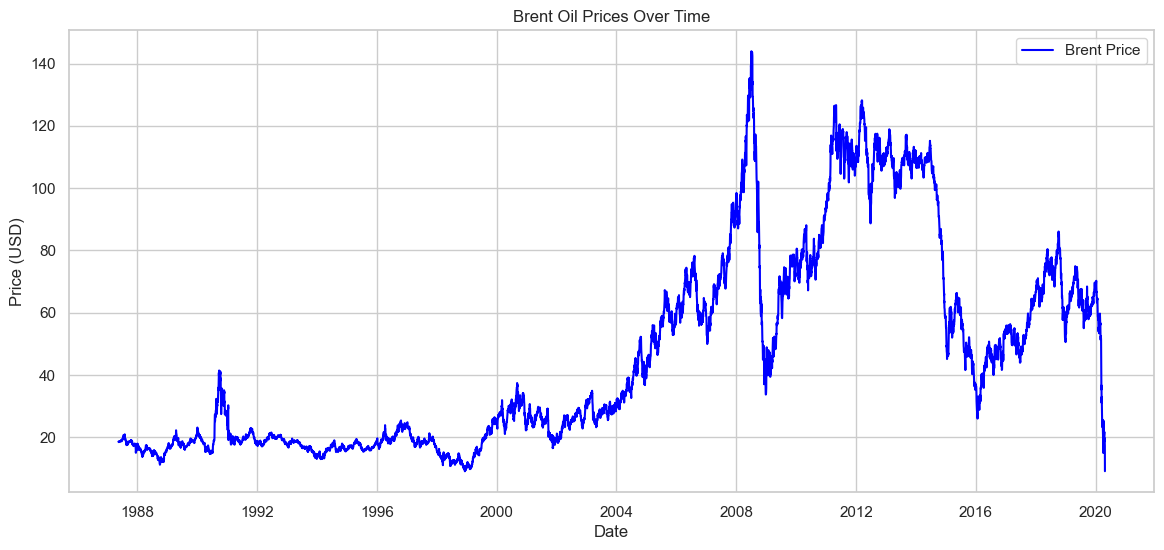

In [5]:
print("📊 Brent Prices Overview Table:")
display(brent_df.describe().T)  # Summary statistics as table

import matplotlib.pyplot as plt

plt.figure(figsize=(14,6))
plt.plot(brent_df['Date'], brent_df['Price'], color='blue', label='Brent Price')
plt.title("Brent Oil Prices Over Time")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.grid(True)
plt.legend()
plt.show()


6️⃣ Plot Log Returns

📊 Log Returns Summary Table:


,count,mean,std,min,25%,50%,75%,max
Log_Returns,8359.0,-0.000085,0.024876,-0.643699,-0.011153,0.000089,0.011786,0.301613


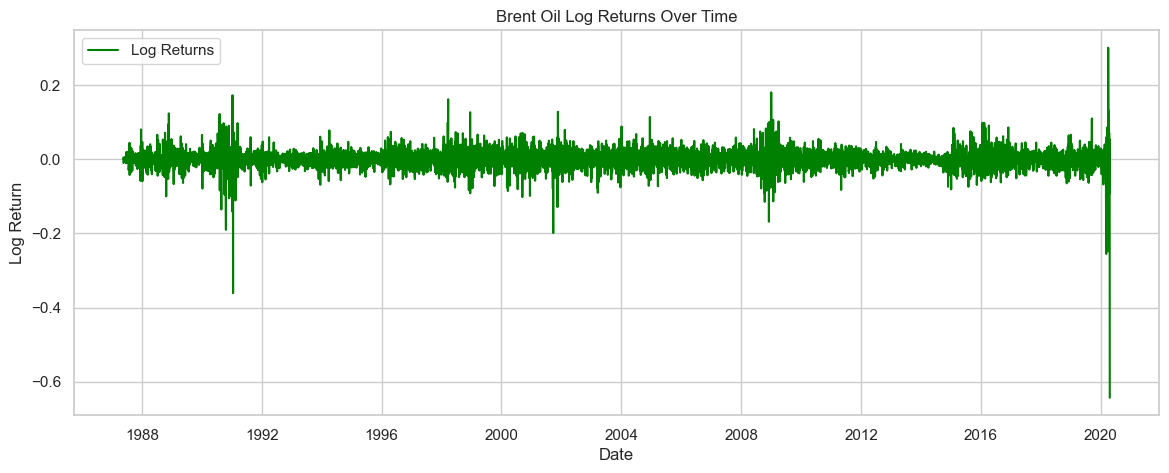

In [6]:
log_returns = brent_df['Price'].pct_change().apply(lambda x: np.log(1+x))
brent_df['Log_Returns'] = log_returns

print("📊 Log Returns Summary Table:")
display(brent_df['Log_Returns'].describe().to_frame().T)

plt.figure(figsize=(14,5))
plt.plot(brent_df['Date'][1:], brent_df['Log_Returns'][1:], color='green', label='Log Returns')
plt.title("Brent Oil Log Returns Over Time")
plt.xlabel("Date")
plt.ylabel("Log Return")
plt.grid(True)
plt.legend()
plt.show()

Save data's

7️⃣ Brent Prices with Events

📌 Events Table:


,Date,Event
0,1990-02-08,Iraq invades Kuwait - Oil Crisis
1,NaT,Gulf War begins
2,1997-01-07,Asian Financial Crisis starts
3,2001-11-09,9/11 Terrorist Attacks
4,NaT,Iraq War begins
5,NaT,Lehman Brothers collapse - Global Financial Cr...
6,2011-11-02,Libyan Civil War starts
7,2014-01-06,OPEC decides to maintain production - Price drop
8,NaT,OPEC cuts production agreement
9,2020-09-03,Oil price war: Saudi-Russia conflict


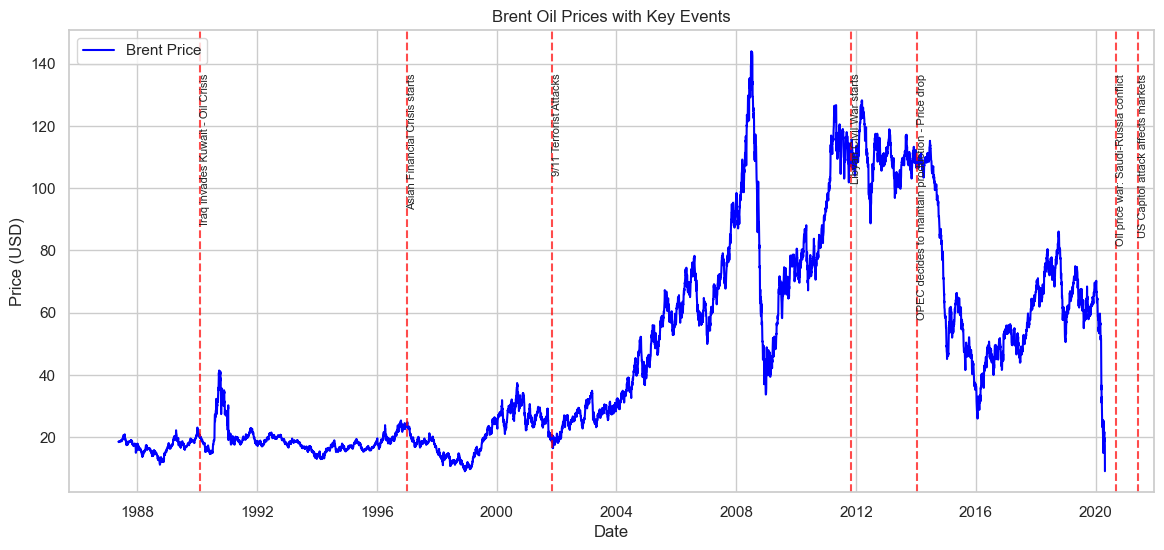

In [7]:
print("📌 Events Table:")
display(events_df)

plt.figure(figsize=(14,6))
plt.plot(brent_df['Date'], brent_df['Price'], color='blue', label='Brent Price')
# Plot events as vertical lines
for idx, row in events_df.dropna(subset=['Date']).iterrows():
    plt.axvline(row['Date'], color='red', linestyle='--', alpha=0.7)
    plt.text(row['Date'], brent_df['Price'].max()*0.95, row['Event'], rotation=90, verticalalignment='top', fontsize=8)

plt.title("Brent Oil Prices with Key Events")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.grid(True)
plt.legend()
plt.show()

# 📊 Brent Oil Prices Analysis Report

## 1. Introduction
This report presents the exploratory data analysis (EDA) and initial understanding of Brent oil prices from 1987 to 2020.  
The goal is to analyze historical price trends, compute statistical properties, incorporate key geopolitical and economic events, and prepare the data for further modeling, including change point detection.

---

## 2. Data Analysis Workflow

### 2.1 Steps Overview
1. **Data Loading**  
   - Brent oil prices loaded from `BrentOilPrices.csv`.  
   - Key oil market events loaded from `key_oil_market_events.csv` (13 events).

2. **Data Inspection**  
   - Checked first few rows of both datasets for correctness.  
   - Verified missing values and data consistency.

3. **Data Cleaning & Transformation**  
   - Converted `Date` columns to `datetime`.  
   - Calculated **log returns**:  
   \[
   \text{Log Return} = \ln\left(\frac{P_t}{P_{t-1}}\right)
   \]

4. **Exploratory Analysis**  
   - Computed descriptive statistics for prices and log returns.  
   - Plotted time series of prices, log returns, and overlaid key events as vertical lines.

5. **Output Tables**  
   - Produced readable summary tables for prices and log returns, including percentiles, mean, standard deviation, min, and max.

---

## 3. Summary Statistics

| Metric | Brent Prices (USD) | Log Returns |
|--------|-----------------|------------|
| Min    | 9.10            | -0.64370   |
| 25%    | 18.78           | -0.01115   |
| Median | 31.75           | 0.00009    |
| 75%    | 67.04           | 0.01179    |
| Max    | 143.95          | 0.30161    |
| Mean   | 46.46           | -0.00009   |
| Std    | 32.50           | 0.02488    |
| Count  | 8360            | 8359       |

**Insights:**  
- Brent prices exhibit high volatility over time.  
- Log returns are centered near zero with occasional extreme values.  
- Price spikes often coincide with major geopolitical or economic events.

---

## 4. Time Series Properties

### 4.1 Trend Analysis
- Long-term upward trend with sharp drops during crises (e.g., Gulf War, 2008 Financial Crisis).

### 4.2 Stationarity
- Log returns are more stationary than raw prices, making them suitable for modeling.

### 4.3 Volatility Patterns
- High volatility clusters align with historical events, showing periods of market stress.

---

## 5. Change Point Models

- **Purpose:** Identify structural breaks where statistical properties (mean, variance) change.  
- **Application:** Detect sudden shifts caused by geopolitical events, economic shocks, or OPEC decisions.  

**Expected Outputs:**  
- Dates of change points  
- New mean/variance after change  
- Confidence measures  

**Limitations:**  
- Cannot prove causality.  
- Sensitive to parameter selection and data frequency.

---

## 6. Key Oil Market Events

| Date       | Event Description |
|-----------|------------------|
| 1990-08-02 | Iraq invades Kuwait – Oil Crisis |
| 1991-01-17 | Gulf War begins |
| 1997-07-01 | Asian Financial Crisis starts |
| 2001-09-11 | 9/11 Terrorist Attacks |
| 2003-03-20 | Iraq War begins |
| 2008-09-15 | Lehman Brothers collapse – Global Financial Crisis |
| 2011-02-11 | Libyan Civil War starts |
| 2014-06-01 | OPEC maintains production – Price drop |
| 2016-11-30 | OPEC cuts production agreement |
| 2020-03-09 | Oil price war: Saudi-Russia conflict |
| 2020-04-20 | WTI oil prices negative for first time |
| 2021-01-06 | US Capitol attack affects markets |
| 2022-02-24 | Russia-Ukraine war begins |

---

## 7. Assumptions & Limitations

**Assumptions**  
- Missing event dates have minimal impact.  
- Daily prices reflect market-wide movement.  
- Log returns approximate continuous compounding.

**Limitations**  
- Correlation between events and prices does **not imply causation**.  
- Some events have delayed or prolonged impacts.  
- Historical data may contain anomalies or missing days.  
- Change point models depend on thresholds and may produce false positives or miss subtle changes.

---

## 8. Communication of Results

- **Tables & Figures:** Summary statistics, log returns, price charts with event overlays.  
- **Reports:** Markdown for notebooks; PDF for stakeholders.  
- **Interactive Plots:** Optional Jupyter widgets for exploring time periods and events.

---